In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os 

In [7]:
os.curdir

'.'

In [9]:
os.chdir("D:\Ineuron\Project\Datasets")
os.listdir()

['adultincomeprediction.csv']

In [10]:
df  = pd.read_csv("adultincomeprediction.csv")

In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can notice above that the dataset has no Null Values, in form on N/A or 0 but it does have null in form of '?"

In [14]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [33]:
income_all = df['salary'].value_counts(normalize=True)
income_all*100


 <=50K    75.919044
 >50K     24.080956
Name: salary, dtype: float64

Here we can see that 75.9% people have income below 50k and remaining have income above 50k,so the data here is imbalance

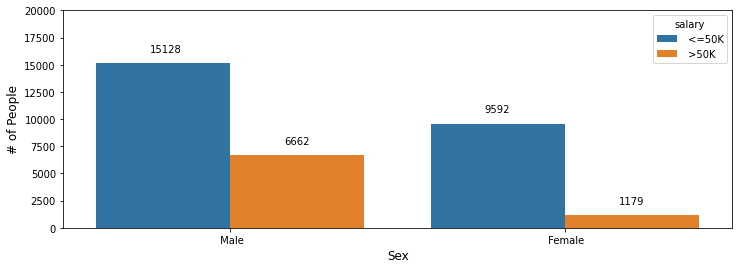

In [25]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'sex', hue="salary")
plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of People", fontsize= 12)
plt.ylim(0,20000)
ax.patches
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))
plt.show()

There are more male than female in our dataset and, apparently, male have a higher salary ratio compared to female.

2. Based on Education

In [35]:
edu = df["education"].value_counts(normalize=True)
edu

 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64

In [36]:
edu.values

array([0.32250238, 0.22391818, 0.16446055, 0.05291607, 0.04244341,
       0.03608612, 0.03276926, 0.02865391, 0.01983969, 0.01768987,
       0.01578576, 0.01329812, 0.01268389, 0.01022696, 0.00515955,
       0.00156629])

In [37]:
edu.index

Index([' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc',
       ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th',
       ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'],
      dtype='object')

c:\Users\pbpra\anaconda3\envs\censusincmepred\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


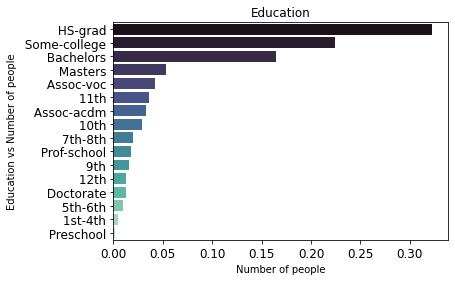

In [38]:
sns.barplot(edu.values, edu.index, palette='mako')
plt.title('Education')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

Here we see that the majority of people have completed HS-Grad, College or Bachelors

3.Based on Marital Status

In [46]:
df['marital-status'].value_counts(normalize=True)

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital-status, dtype: float64

In [48]:
status = df["marital-status"].value_counts()
status

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

c:\Users\pbpra\anaconda3\envs\censusincmepred\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


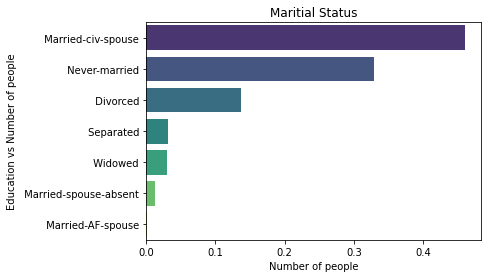

In [43]:
sns.barplot(status.values, status.index, palette='viridis')
plt.title('Maritial Status')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
#plt.tick_params(labelsize=12)
plt.show()

4. Based on Age

c:\Users\pbpra\anaconda3\envs\censusincmepred\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


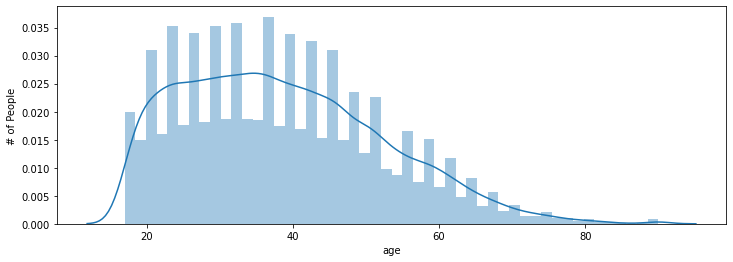

In [44]:
plt.figure(figsize=(12,4))

sns.distplot(df['age'])
plt.ylabel('# of People')
plt.show()

The Average age is around 38-40 yrs

5. Based on Race

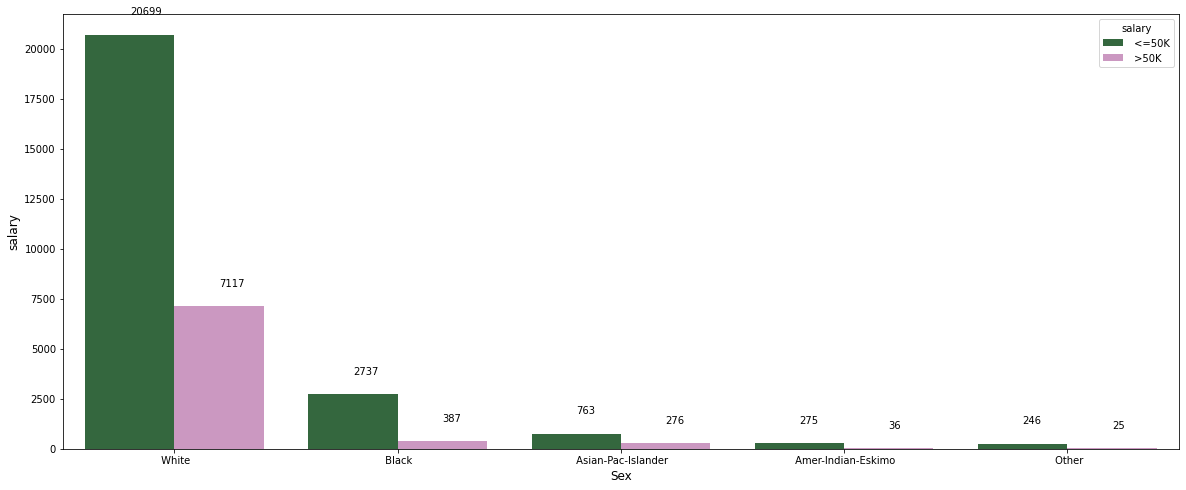

In [45]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df, x = 'race', hue="salary", palette = 'cubehelix')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("salary", fontsize= 12)


for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+1000))

 Income With Respect to Education

c:\Users\pbpra\anaconda3\envs\censusincmepred\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


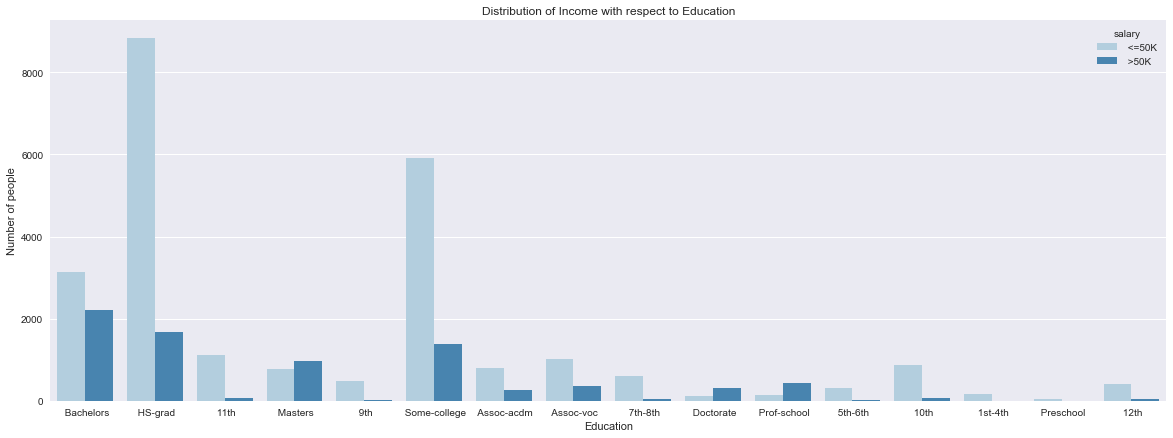

In [52]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['education'],hue=df['salary'], palette='Blues')
plt.title('Distribution of Income with respect to Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.show()

Income with respect to Marital Status

c:\Users\pbpra\anaconda3\envs\censusincmepred\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


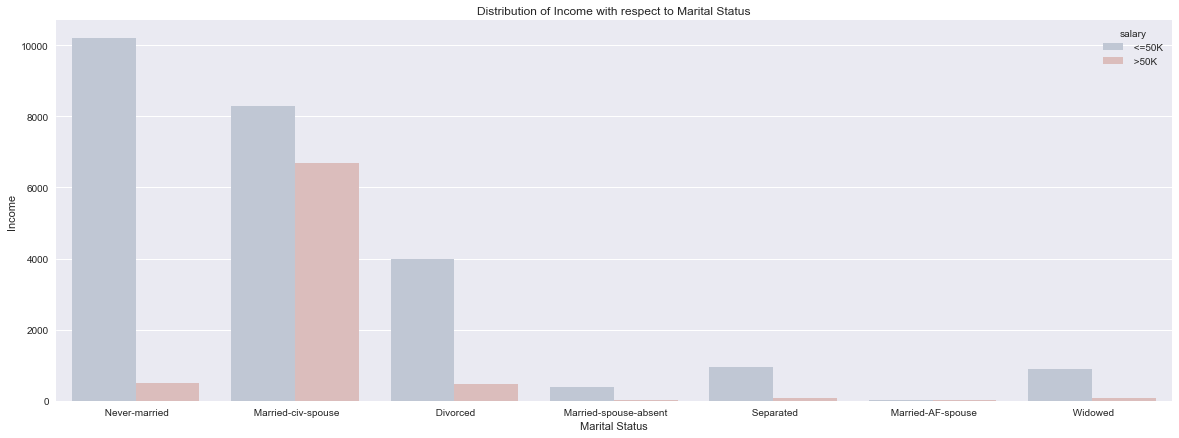

In [55]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['marital-status'],
              hue=df['salary'], palette='vlag')
plt.title('Distribution of Income with respect to Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
#plt.tick_params(labelsize=12)
#plt.legend(loc=1, prop={'size': 15})
plt.show()

Average Hours per Week

c:\Users\pbpra\anaconda3\envs\censusincmepred\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


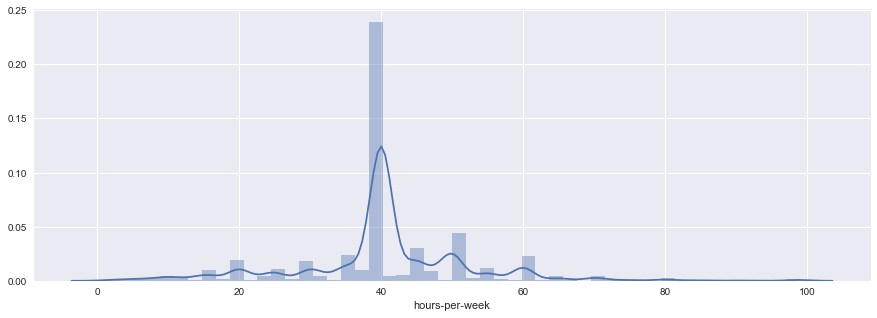

In [57]:
plt.figure(figsize=(15,5))

sns.distplot(df['hours-per-week'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

In [59]:
df["hours-per-week"].mean()

40.437455852092995

Seems that the average Hours per week put by an individual is 40

# Occupation

c:\Users\pbpra\anaconda3\envs\censusincmepred\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


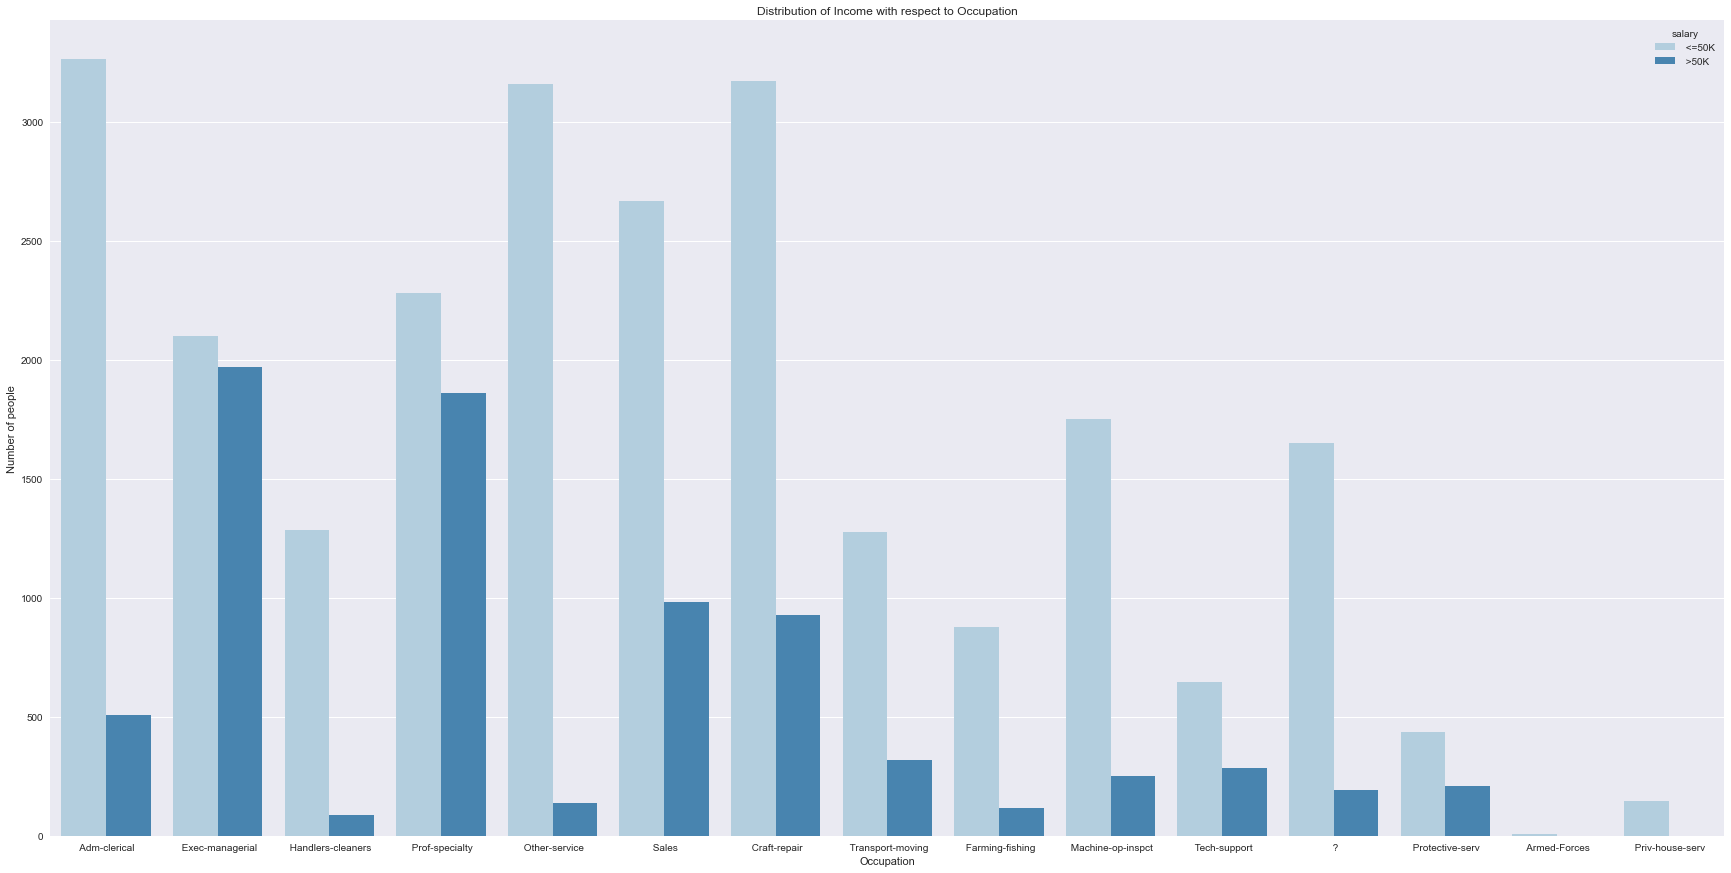

In [61]:
plt.style.use('seaborn')
plt.figure(figsize=(30, 15))
sns.countplot(df['occupation'],
              hue=df['salary'], palette='Blues')
plt.title('Distribution of Income with respect to Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of people')
#plt.tick_params(labelsize=12)
#plt.legend(loc=1, prop={'size': 15})
plt.show()

In [62]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [63]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [64]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [65]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

In [66]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education-num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital-status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


Here is it quite visible that education,fnlwgt,native.country,race, etc have minimum to no relation with the final output income of Income hence we will be dropping these

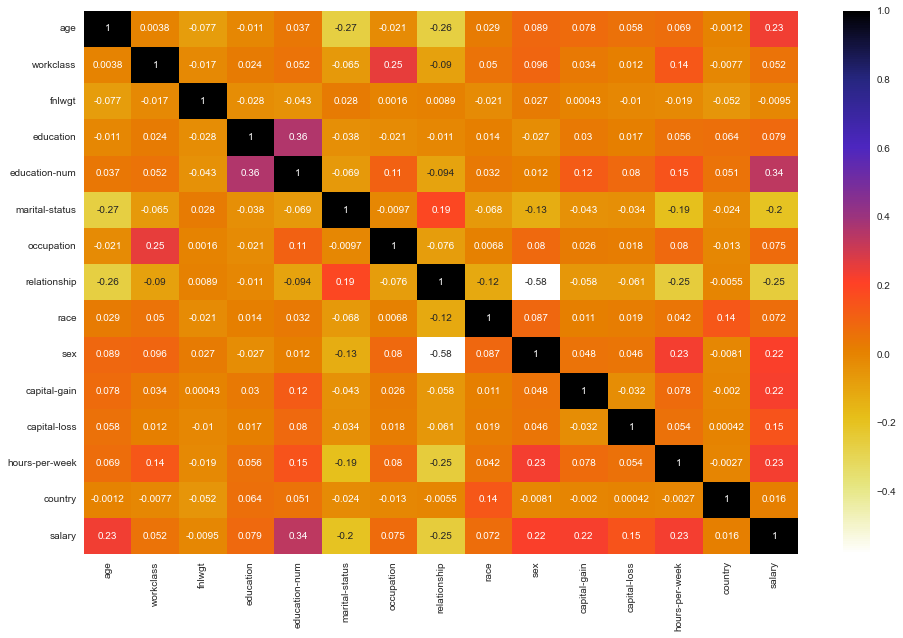

In [71]:
plt.figure(figsize=(16,10))
cor = df.corr()
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

In [118]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr



In [120]:
correlation(X,0.4)

{'sex'}

In [108]:
X = df.drop(["fnlwgt","education","marital-status","relationship","country"],axis=1)
X

,age,workclass,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,7,13,1,4,1,2174,0,40,0
1,50,6,13,4,4,1,0,0,13,0
2,38,4,9,6,4,1,0,0,40,0
3,53,4,7,6,2,1,0,0,40,0
4,28,4,13,10,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,4,12,13,4,0,0,0,38,0
32557,40,4,9,7,4,1,0,0,40,1
32558,58,4,9,1,4,0,0,0,40,0
32559,22,4,9,1,4,1,0,0,20,0


In [111]:
X = df.drop("salary",axis=1)
y = df.salary

In [112]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [95]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int32

In [96]:
y.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: salary, dtype: float64

In [113]:
# balancing the skewed data
from imblearn.over_sampling import RandomOverSampler 
rs = RandomOverSampler(random_state=30)

In [114]:
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [115]:
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

0    0.5
1    0.5
Name: salary, dtype: float64

In [116]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
